<a href="https://colab.research.google.com/github/QorbQuant/Aave-v3-How-to-Calculate-User-Deposits/blob/main/Stablecoin_Race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install matplotlib bar_chart_race

In [17]:
import pandas as pd
import bar_chart_race as bcr

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Load the data
file_path = '/content/stablecoins - stablecoins (1).csv'
data = pd.read_csv(file_path)


Animation saved as 'stablecoins_bar_chart_race_millions.mp4' with 1280 frames and an interval of 35.16 ms per frame.


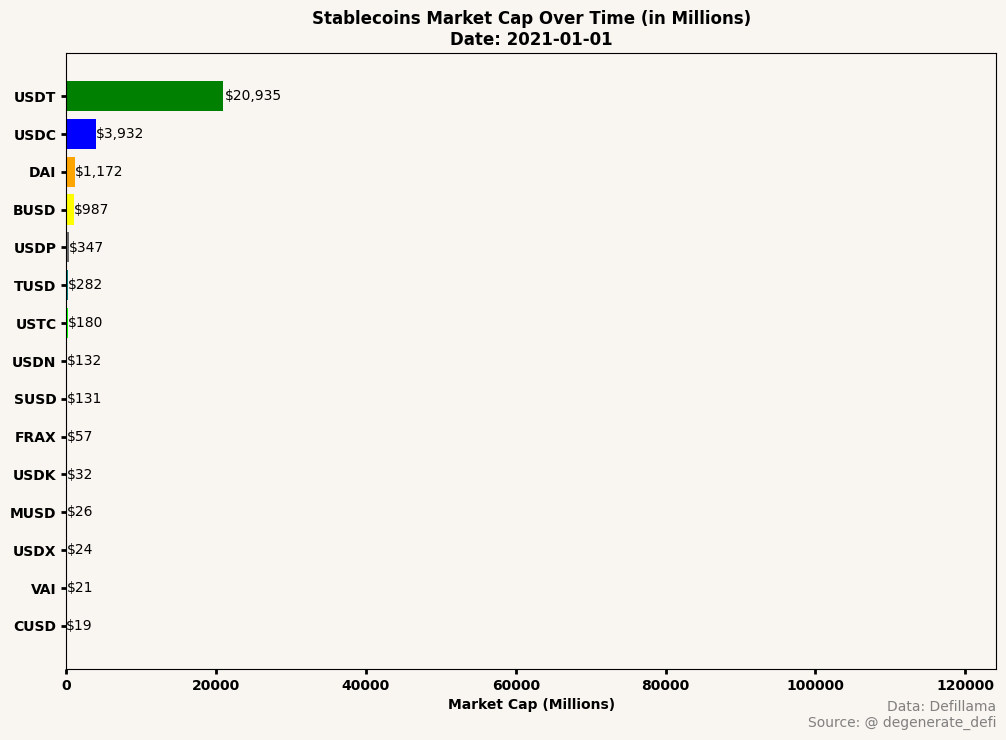

In [23]:


# Convert the 'Timestamp' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# data = data.drop(columns=['USDT', 'USDC'])


# Convert the values to millions
data = data / 1_000_000

# Calculate the interval
total_duration = 45000  # 45 seconds
num_frames = len(data)
interval = total_duration / num_frames

# Custom colors
custom_colors = {
    'USDT': 'green',
    'USDC': 'blue',
    'DAI': 'orange',
    'BUSD': 'yellow',
    'FRAX': 'black',
    'USTC': 'lime',
    'LUSD': 'slateblue',
    'USDP': 'dimgray',
    'FEI': 'darkkhaki',
    'TUSD': 'teal',
    'MIM': 'darkred'
}

# Get a list of all stablecoins
stablecoins = data.columns.tolist()

# Assign random colors to stablecoins not in custom_colors
color_map = plt.cm.tab20(np.linspace(0, 1, len(stablecoins)))
for i, stablecoin in enumerate(stablecoins):
    if stablecoin not in custom_colors:
        custom_colors[stablecoin] = color_map[i % len(color_map)]



# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#f9f5f0')  # Set figure background color
ax.set_facecolor('#f9f5f0')  # Set axes background color

# Function to update the bars for each frame
def update(num):
    ax.clear()
    values = data.iloc[num].sort_values(ascending=False).head(15)
    values = values.sort_values()  # Sort again to ensure largest is at the top
    colors = [custom_colors[name] for name in values.index]
    bars = ax.barh(values.index, values.values, color=colors)
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + (width * 0.01)
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'${width:,.0f}', va='center', ha='left')
    ax.set_xlim(0, data.max().max() * 1.1)
    ax.set_title(f"Stablecoins Market Cap Over Time (in Millions)\nDate: {data.index[num].strftime('%Y-%m-%d')}", fontweight='bold')
    ax.set_xlabel('Market Cap (Millions)', fontweight='bold')
    ax.tick_params(axis='x', labelsize=10, width=2)
    ax.tick_params(axis='y', labelsize=10, width=2)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    # Add annotation
    ax.text(1.0, -0.05, 'Data: Defillama\nSource: @ degenerate_defi', transform=ax.transAxes, ha='right', va='top', fontsize=10, color='gray')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=interval, repeat=False)

# Save the animation
ani.save('stablecoins_bar_chart_race_millions.mp4')

print(f"Animation saved as 'stablecoins_bar_chart_race_millions.mp4' with {num_frames} frames and an interval of {interval:.2f} ms per frame.")


In [ ]:

# data_alt = pd.read_csv(file_path)

# # Convert the 'Timestamp' column to datetime
# data_alt['Date'] = pd.to_datetime(data_alt['Date'])

# # Set the 'Date' column as the index
# data_alt.set_index('Date', inplace=True)

# # Remove USDT and USDC from the data
# data_alt = data_alt.drop(columns=['USDT', 'USDC'])

# # Convert the values to millions
# data_alt = data_alt / 1_000_000

# # Calculate the interval
# total_duration = 45000  # 45 seconds
# num_frames = len(data_alt)
# interval = total_duration / num_frames

# # Custom colors for remaining stablecoins
# custom_colors = {
#     'DAI': 'orange',
#     'BUSD': 'yellow'
# }

# # Get a list of all stablecoins
# stablecoins = data_alt.columns.tolist()

# # Assign random colors to stablecoins not in custom_colors
# color_map = plt.cm.tab20(np.linspace(0, 1, len(stablecoins) + len(custom_colors)))
# for i, stablecoin in enumerate(stablecoins):
#     if stablecoin not in custom_colors:
#         custom_colors[stablecoin] = color_map[i]

# # Initialize the figure and axis with an off-white background color
# fig, ax = plt.subplots(figsize=(12, 8))
# fig.patch.set_facecolor('#f9f5f0')  # Set figure background color
# ax.set_facecolor('#f9f5f0')  # Set axes background color

# # Function to update the bars for each frame
# def update(num):
#     ax.clear()
#     values = data_alt.iloc[num].sort_values(ascending=False).head(15)
#     values = values.sort_values()  # Sort again to ensure largest is at the top
#     colors = [custom_colors[name] for name in values.index]
#     bars = ax.barh(values.index, values.values, color=colors)
#     for bar in bars:
#         width = bar.get_width()
#         label_x_pos = width + (width * 0.01)
#         ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'${width:,.0f}', va='center', ha='left', fontweight='bold')
#     ax.set_xlim(0, data_alt.max().max() * 1.1)
#     ax.set_title(f"Top Stablecoins (Excl USDT/USDC) Market Cap Over Time (in Millions)\nDate: {data_alt.index[num].strftime('%Y-%m-%d')}", fontweight='bold')
#     ax.set_xlabel('Market Cap (Millions)', fontweight='bold')
#     ax.tick_params(axis='x', labelsize=10, width=2)
#     ax.tick_params(axis='y', labelsize=10, width=2)
#     plt.xticks(fontweight='bold')
#     plt.yticks(fontweight='bold')
#     # Add annotation
#     ax.text(1.0, -0.1, 'Data: Defillama\nSource: @ degenerate_defi', transform=ax.transAxes, ha='right', va='top', fontsize=10, color='gray')

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=interval, repeat=False)

# # Save the animation
# ani.save('stablecoins_bar_chart_race_millions_excluding_usdt_usdc.mp4')

# print(f"Animation saved as 'stablecoins_bar_chart_race_millions_excluding_usdt_usdc.mp4' with {num_frames} frames and an interval of {interval:.2f} ms per frame.")